# Analysis for San Francisco Bay Ford GoBike Service
## by Gbenga Thompson Awojinrin

## Investigation Overview


> Ford GoBike is the Bay Area’s bike share system. Bay Area Bike Share was introduced in 2013. It services San Francisco, the East Bay and San Jose. 
Similar to other bike share systems, Ford GoBike consists of a fleet of bikes that can be unlocked in one station and returned in any other network station. Thus, this is ideal for one-way trips. These bikes are available for use thorughout the year and riders have access to all bikes in the network.
In this project, we want to demonstrate the importance and value of data visualization techniques in understanding trends and patterns in datasets using Python libraries, such as NumPy, Pandas, Matplotlib, and Seaborn.


## Dataset Overview

> There are 183,412 records with 16 features: 
<ul>
    <li>duration_sec</li>
    <li>start_time</li>
    <li>end_time</li>
    <li>start_station_id</li>
    <li>start_station_name</li>
    <li>start_station_latitude</li>
    <li>start_station_longitude</li>
    <li>end_station_id</li>
    <li>end_station_name</li>
    <li>end_station_latitude</li>
    <li>end_station_longitude</li>
    <li>bike_id</li>
    <li>user_type</li>
    <li>member_birth_year</li>
    <li>member_gender</li>
    <li>bike_share_for_all_trip.</li>
</ul>  
Out of the 16 features, 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Data Wrangling

In [3]:
df.start_time = pd.to_datetime(df.start_time)

def get_start_hour(timestamp_obj):
    return timestamp_obj.hour

def get_start_day(timestamp_obj):
    return timestamp_obj.day_name()


In [4]:
# Create the hour and day features to keep track of when a ride started

df['start_hour'] = df.start_time.apply(get_start_hour)
hours = [i for i in range(24)]
cat_hours = pd.api.types.CategoricalDtype(categories = hours, ordered=True)
df.start_hour = df.start_hour.astype(cat_hours)

df['start_day'] = df.start_time.apply(get_start_day)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_cat = pd.api.types.CategoricalDtype(categories = days, ordered = True)
df.start_day = df.start_day.astype(day_cat)

In [5]:
# Converting the duration from seconds to minutes
df['duration_min'] = df['duration_sec'] / 60

# Converting birth year to age
df['user_age'] = 2019 - df['member_birth_year']

In [6]:
def log_transform(data, inverse = False):
    if not inverse:
        return np.log(data)
    else:
        return np.e ** data

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of the duration of rides

> The histograms below explore the distribution of the duration of rides in the dataset. The first plot is a normal histogram, with the ride's duration (in minutes) plotted on the x-axis. This gives us a chart that is skewed to the right. Using the log-transform of the ride's duration as well as setting limits for the x-axis in the second histogram gives us a chart we can more easily understand and relate with, a right-skewed normal distribution, with most of the rides less than 50 minutes, and the most trips taking around 5 - 20 minutes.

Text(0.5, 1.0, 'Distribution of Ride Durations')

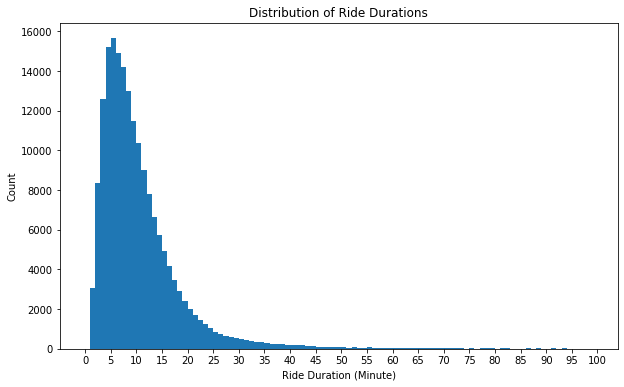

In [7]:
plt.figure(figsize = (10, 6))
bins = np.arange(0, 100, 1)
ticks = np.arange(0, 101, 5)
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xticks(ticks, ticks);
plt.xlabel('Ride Duration (Minute)');
plt.ylabel('Count')
plt.title('Distribution of Ride Durations')

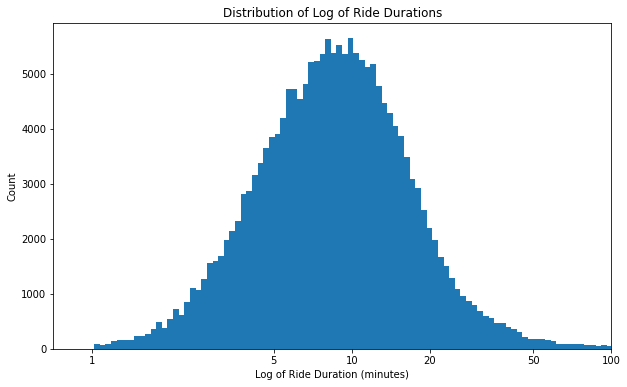

In [8]:
# Plotting frequency of the log of duration_min

df['log_duration'] = log_transform(df.duration_min)

bin_size = .05
bins = np.arange(df.log_duration.min(), df.log_duration.max() + bin_size, bin_size)
ticks = log_transform([1, 5, 10, 20, 50, 100])
labels = [1, 5, 10, 20, 50, 100]

plt.figure(figsize = (10, 6))
plt.hist(data = df, x = 'log_duration', bins = bins)
plt.xlabel('Log of Ride Duration (minutes)')
plt.xlim(right = log_transform(100))
plt.xticks(ticks, labels)
plt.ylabel('Count')
plt.title('Distribution of Log of Ride Durations');

## Distribution of User Age

> The histogram below show that the userbase for the Ford GoBike system is made up of people mostly between the ages of 20 and 45.

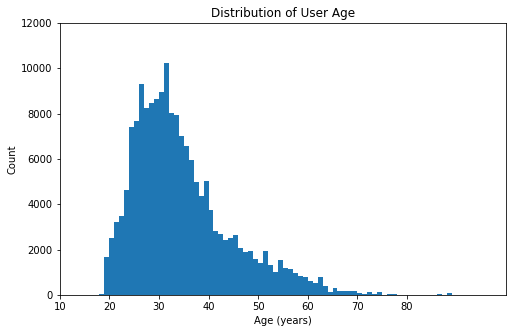

In [9]:
# Plotting the distribution of user age
binsize = 1
bins = np.arange(0, df['user_age'].astype(float).max()+binsize, binsize)
tick = [10, 20, 30, 40, 50, 60, 70, 80]
label = [str(i) for i in tick]

plt.figure(figsize=[8, 5])
plt.hist(data = df.dropna(), x = 'user_age', bins = bins)
plt.axis([10, 100, 0, 12000])
plt.xticks(tick, label)
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Count');

## User Types

> The pie chart below indicates that 89% of the users of this bike sharing system are subscribers, while 11% are customers

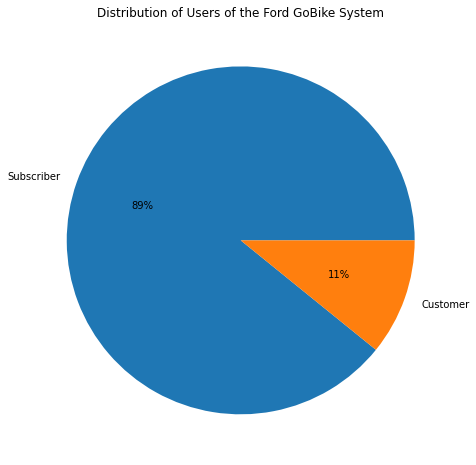

In [10]:
# plotting types of users on bar.
user_type_count = df.user_type.value_counts()
plt.figure(figsize=[8,8])
plt.pie(user_type_count.values, labels = user_type_count.index, autopct='%.0f%%')
plt.title('Distribution of Users of the Ford GoBike System');

## Duration of ride based on user type and start hour

> For both user types, we observe a similar bimodal distribution of rides across the hours of the day. Peak periods when the most rides start are at 8AM in the morning, and 5PM in the evening.  
It is also observed that 3AM is the hour of the day with the least number of rides.

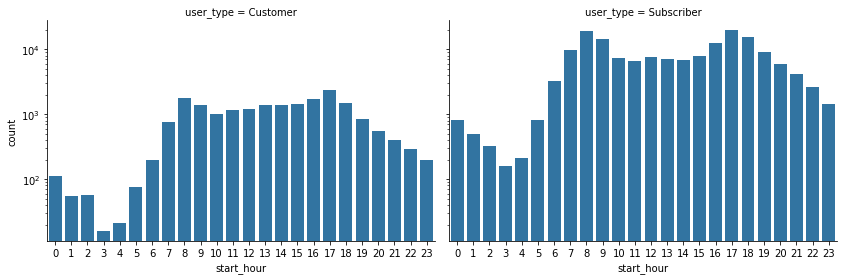

In [11]:
# Plotting user type against start hour
g = sb.FacetGrid(data = df, col = 'user_type', size = 4, aspect = 1.5)
g.map(sb.countplot, 'start_hour')
plt.yscale('log');

## Duration of ride based on user age

> From the bivariate analysis of user age vs ride duration, we see that most of the rides in this dataset are from users between the ages of 20 and 50, with the rides typically lasting less than 30 minutes.

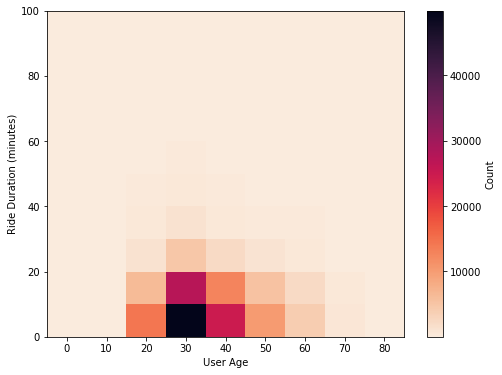

In [12]:
plt.figure(figsize = (8, 6))
bins_y = np.arange(0, 101, 10)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(df.user_age, df.duration_min, bins = [bins_x, bins_y], cmap = 'rocket_r')
plt.xlabel('User Age')
plt.ylabel('Ride Duration (minutes)')
plt.colorbar(ticks=[10000, 20000, 30000, 40000], label = 'Count');

## Bike Service Popular Times

> Based on the bivariate plot of start hour faceted by the day of the week, we now have a better understanding of how busy the bike sharing system can be at any point in time. These set of plots can serve as a recommendation tool that helps people plan what hour of the day they want to use the bike sharing system.  
To summarize the findings:<li>Weekdays, from Monday to Friday, follow the bimodal distribution we observed in our bivariate analysis of user type vs start hour, with peak periods at 8AM and 5PM, and least busy period at 3AM.</li><li>For Saturday and Sunday, a different distribution is evident, with traffic being least busy at $AM in the morning, after which it steadily rises till 1-2PM in the afternoon where it peaks out and starts to decline again.</li>

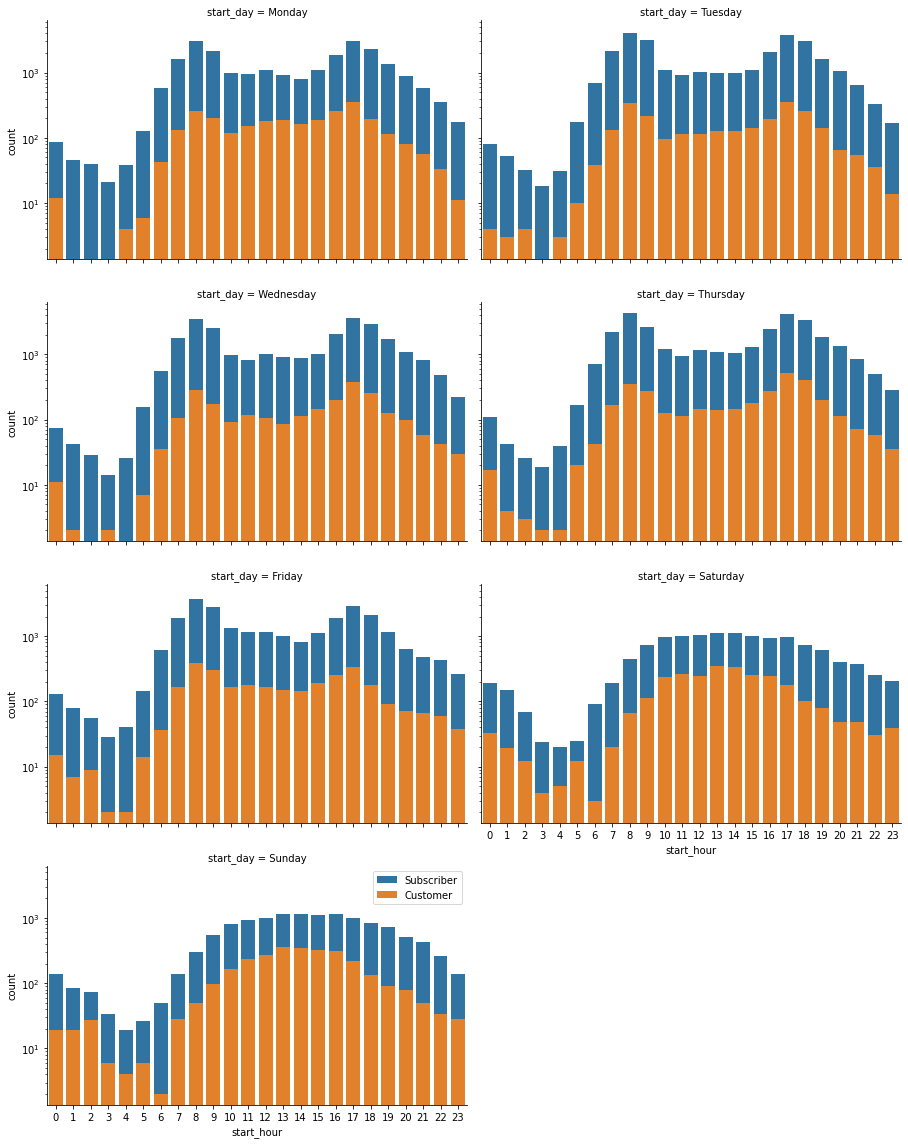

In [13]:
# Plotting start_day against start hour
g = sb.FacetGrid(data = df, col = 'start_day', hue = 'user_type', hue_order=['Subscriber', 'Customer'], height = 4, aspect = 1.6, col_wrap = 2)
g.map(sb.countplot, 'start_hour')
plt.yscale('log')
plt.legend(labels = ['Subscriber', 'Customer']);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
